#Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df_tata_motors = pd.read_csv('Tata_Motors.csv')
df_tata_motors.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-13,556.728516,561.180786,549.110229,559.548279,557.583984,3506531
1,2015-02-16,562.961670,574.290161,559.498840,568.057007,566.062805,5793607
2,2015-02-18,566.622437,580.770630,554.700256,578.099304,576.069885,5846505
3,2015-02-19,579.781250,586.261780,566.028748,570.431580,568.429016,4316943
4,2015-02-20,573.350220,578.791870,566.177185,573.745972,571.731750,3907248


In [3]:
df_tata_motors.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2216,2024-02-07,944.000000,944.000000,928.049988,933.799988,933.799988,7913010
2217,2024-02-08,937.000000,939.700012,918.799988,924.299988,924.299988,11576253
2218,2024-02-09,926.000000,927.400024,906.049988,915.000000,915.000000,7904881
2219,2024-02-12,916.099976,925.000000,908.000000,911.599976,911.599976,7286778
2220,2024-02-13,911.599976,919.099976,894.000000,906.900024,906.900024,8574218


In [4]:
# Calculate Simple Moving Average (SMA)
df_tata_motors['SMA'] = df_tata_motors['Close'].rolling(window=20, min_periods=1).mean()
# Calculate Exponential Moving Average (EMA)
df_tata_motors['EMA'] = df_tata_motors['Close'].ewm(span=20, adjust=False).mean()

# Calculate Smoothed Moving Average (SMMA)
alpha = 1/20
smma_values = [df_tata_motors['Close'].iloc[0]] # Start with the first value
for price in df_tata_motors['Close'].iloc[1:]:
    smma_values.append((price * alpha) + smma_values[-1] * (1 - alpha))
df_tata_motors['SMMA'] = smma_values

# Calculate Linear Weighted Moving Average (LWMA)
weights = np.arange(1, 21) # Weighting factors
weights = weights / weights.sum()
df_tata_motors['LWMA'] = df_tata_motors['Close'].rolling(window=20, min_periods=1).apply(lambda prices: np.dot(prices[-len(weights):], weights[-len(prices):]), raw=True)

In [5]:
# Calculate Moving Average Convergence Divergence (MACD)
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    short_ema = df['Close'].ewm(span=short_window, min_periods=1, adjust=False).mean()
    long_ema = df['Close'].ewm(span=long_window, min_periods=1, adjust=False).mean()
    macd_line = short_ema - long_ema
    signal_line = macd_line.ewm(span=signal_window, min_periods=1, adjust=False).mean()
    macd_histogram = macd_line - signal_line
    return macd_line, signal_line, macd_histogram

df_tata_motors['MACD'], df_tata_motors['MACD_Signal'], df_tata_motors['MACD_Histogram'] = calculate_macd(df_tata_motors)

In [6]:
# Calculate Relative Strength Index (RSI)
def calculate_rsi(df, window=14):
    delta = df['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window, min_periods=1).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window, min_periods=1).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_tata_motors['RSI'] = calculate_rsi(df_tata_motors)

In [7]:
# Calculate On-Balance Volume (OBV)
def calculate_obv(df):
    obv = []
    prev_obv = 0
    for i in range(1, len(df)):
        if df['Close'].iloc[i] > df['Close'].iloc[i - 1]:
            obv.append(prev_obv + df['Volume'].iloc[i])
        elif df['Close'].iloc[i] < df['Close'].iloc[i - 1]:
            obv.append(prev_obv - df['Volume'].iloc[i])
        else:
            obv.append(prev_obv)
        prev_obv = obv[-1]
    return pd.Series(obv, index=df.index[1:])

df_tata_motors['OBV'] = calculate_obv(df_tata_motors)

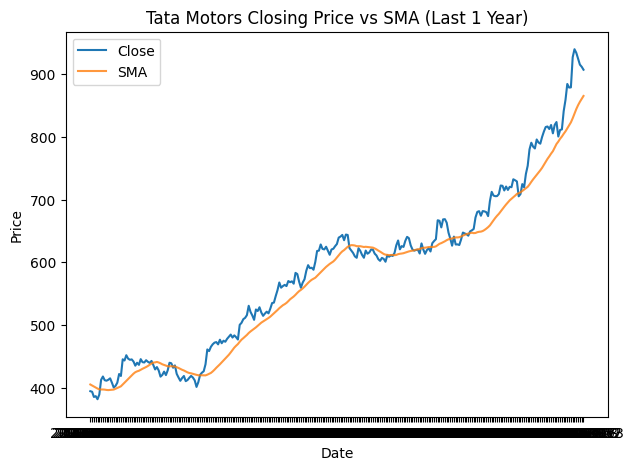

In [8]:
# Filter the data for the last 1 year
last_year = df_tata_motors[df_tata_motors['Date'] > '2022-12-31']
plt.figure(figsize = (7,5))
plt.plot(last_year['Date'], last_year['Close'], label='Close')
plt.plot(last_year['Date'], last_year['SMA'], label= 'SMA', alpha=0.8)
plt.title(f'Tata Motors Closing Price vs SMA (Last 1 Year)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

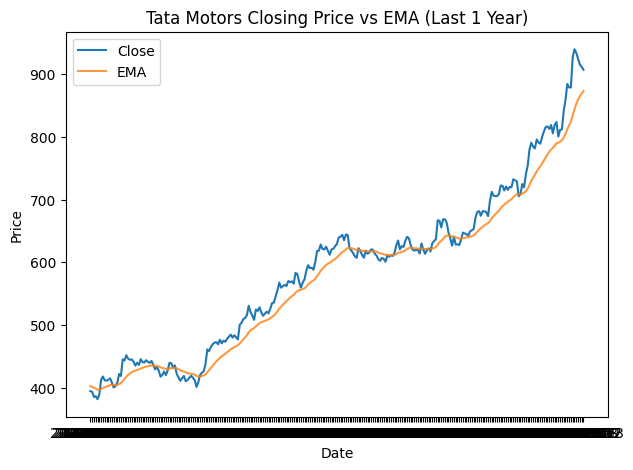

In [9]:
plt.figure(figsize = (7,5))
plt.plot(last_year['Date'], last_year['Close'], label='Close')
plt.plot(last_year['Date'], last_year['EMA'], label= 'EMA', alpha=0.8)
plt.title(f'Tata Motors Closing Price vs EMA (Last 1 Year)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

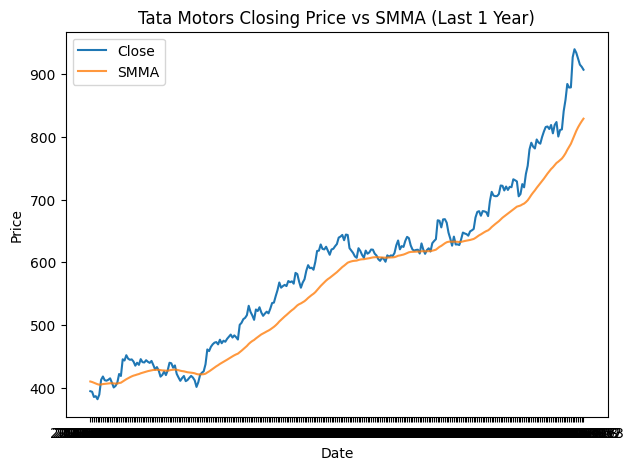

In [10]:
plt.figure(figsize = (7,5))
plt.plot(last_year['Date'], last_year['Close'], label='Close')
plt.plot(last_year['Date'], last_year['SMMA'], label= 'SMMA', alpha=0.8)
plt.title(f'Tata Motors Closing Price vs SMMA (Last 1 Year)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

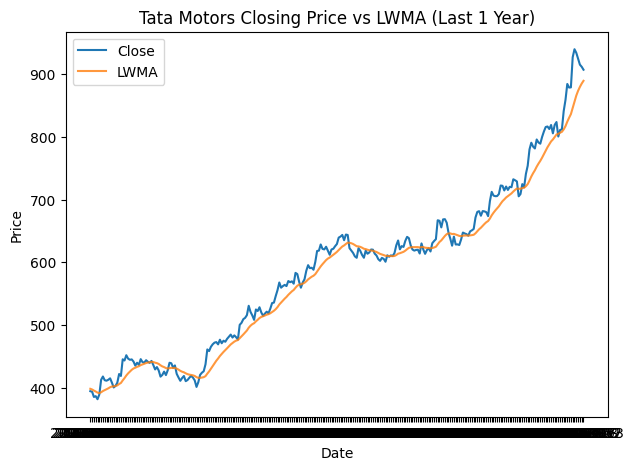

In [11]:
plt.figure(figsize = (7,5))
plt.plot(last_year['Date'], last_year['Close'], label='Close')
plt.plot(last_year['Date'], last_year['LWMA'], label= 'LWMA', alpha=0.8)
plt.title(f'Tata Motors Closing Price vs LWMA (Last 1 Year)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [12]:
df_tata_motors.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,SMMA,LWMA,MACD,MACD_Signal,MACD_Histogram,RSI,OBV
0,2015-02-13,556.728516,561.180786,549.110229,559.548279,557.583984,3506531,559.548279,559.548279,559.548279,53.290312,0.000000,0.000000,0.000000,NaN,NaN
1,2015-02-16,562.961670,574.290161,559.498840,568.057007,566.062805,5793607,563.802643,560.358634,559.973715,104.726464,0.678759,0.135752,0.543007,100.000000,5793607.0
2,2015-02-18,566.622437,580.770630,554.700256,578.099304,576.069885,5846505,568.568197,562.048222,560.879995,154.413992,2.003910,0.509383,1.494527,100.000000,11640112.0
3,2015-02-19,579.781250,586.261780,566.028748,570.431580,568.429016,4316943,569.034042,562.846637,561.357574,200.618406,2.407627,0.889032,1.518595,70.754805,7323169.0
4,2015-02-20,573.350220,578.791870,566.177185,573.745972,571.731750,3907248,569.976428,563.884668,561.976994,244.422136,2.960888,1.303403,1.657484,74.036882,11230417.0


In [13]:
df_tata_motors.drop(['Open','High','Low','Volume','Adj Close'],axis=1,inplace=True)

In [14]:
df_tata_motors.columns

Index(['Date', 'Close', 'SMA', 'EMA', 'SMMA', 'LWMA', 'MACD', 'MACD_Signal',
       'MACD_Histogram', 'RSI', 'OBV'],
      dtype='object')

In [15]:
# Convert 'Date' column to datetime
df_tata_motors['Date'] = pd.to_datetime(df_tata_motors['Date'])
df_tata_motors['Date'].dtype

dtype('<M8[ns]')

In [16]:
df_tata_motors.isnull().sum()

,0
Date,0
Close,0
SMA,0
EMA,0
SMMA,0
LWMA,0
MACD,0
MACD_Signal,0
MACD_Histogram,0
RSI,1


In [17]:
# Replace missing values in 'RSI' and 'OBV' columns with mean
df_tata_motors['RSI'].fillna(df_tata_motors['RSI'].mean(), inplace=True)
df_tata_motors['OBV'].fillna(df_tata_motors['OBV'].mean(), inplace=True)

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Separate features and target variable
X = df_tata_motors[['SMA', 'EMA', 'SMMA', 'LWMA' ,'MACD', 'RSI', 'OBV']]
y = df_tata_motors['Close']

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Use SelectKBest to select top k features based on f_regression
k = 4
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X_normalized, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['SMA', 'EMA', 'SMMA', 'LWMA'], dtype='object')


#ARIMA

In [19]:
from statsmodels.tsa.arima.model import ARIMA
# Prepare the Data
arima_data = df_tata_motors[['Close']]
arima_data

,Close
0,559.548279
1,568.057007
2,578.099304
3,570.431580
4,573.745972
...,...
2216,933.799988
2217,924.299988
2218,915.000000
2219,911.599976


In [20]:
# Normalizing Data for ARIMA model
arima_scaler = MinMaxScaler()
arima_data = arima_scaler.fit_transform(arima_data)
arima_data

array([[0.56533976],
       [0.57507236],
       [0.58655912],
       ...,
       [0.9719188 ],
       [0.96802973],
       [0.96265374]])

In [21]:
# Split the data into training and testing sets
train, test = train_test_split(arima_data, test_size=0.2, shuffle=False)

# Fit the ARIMA model on the training data
arima_model = ARIMA(train, order=(5,1,0))
arima_model_fit = arima_model.fit()

# Make predictions
predictions = arima_model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

# Inverse transform the predictions to original scale
predictions = arima_scaler.inverse_transform(predictions.reshape(-1, 1))

# Inverse transform the test set values
test = arima_scaler.inverse_transform(test)

# Calculate performance metrics
arima_rmse = np.sqrt(mean_squared_error(test, predictions))
arima_mdape_value = median_absolute_error(test, predictions)
arima_mae = mean_absolute_error(test, predictions)

# Output the performance metrics
print('ARIMA RMSE = ', arima_rmse)
print(f"ARIMA MdAPE = {arima_mdape_value}")
print(f"ARIMA MAE =  {arima_mae}")

ARIMA RMSE =  163.56128685972942
ARIMA MdAPE = 41.31293000523539
ARIMA MAE =  109.63292086882966


# Prophet

In [22]:
pip install prophet

In [23]:
from prophet import Prophet
# Prepare the data for Prophet
prophet_df = df_tata_motors[['Date', 'Close']]
prophet_df.columns = ['ds', 'y']
prophet_df.head()

,ds,y
0,2015-02-13,559.548279
1,2015-02-16,568.057007
2,2015-02-18,578.099304
3,2015-02-19,570.431580
4,2015-02-20,573.745972


In [24]:
prophet_scaler = MinMaxScaler()
prophet_df['y'] = prophet_scaler.fit_transform(prophet_df[['y']])
prophet_df.head()

,ds,y
0,2015-02-13,0.565340
1,2015-02-16,0.575072
2,2015-02-18,0.586559
3,2015-02-19,0.577788
4,2015-02-20,0.581580


In [25]:
# Initialize and fit the model
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(prophet_df)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)
forecast['yhat']

DEBUG:cmdstanpy:input tempfile: /tmp/tmp629creyi/idmk1q_0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp629creyi/_cst0wea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40213', 'data', 'file=/tmp/tmp629creyi/idmk1q_0.json', 'init=/tmp/tmp629creyi/_cst0wea.json', 'output', 'file=/tmp/tmp629creyi/prophet_modelp0u6xrnt/prophet_model-20241214143147.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:31:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:31:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,yhat
0,0.599203
1,0.588623
2,0.581780
3,0.578915
4,0.575281
...,...
2581,0.892727
2582,0.943182
2583,0.942402
2584,0.941833


In [26]:
# Inverse transform the forecasts to original scale
forecast['yhat'] = prophet_scaler.inverse_transform(forecast[['yhat']])
forecast['yhat']

,yhat
0,589.153269
1,579.903713
2,573.921009
3,571.416356
4,568.239064
...,...
2581,845.766519
2582,889.877219
2583,889.194651
2584,888.697223


In [27]:
# Calculate performance metrics on the original scale
y_true = prophet_scaler.inverse_transform(prophet_df[['y']])
y_pred = forecast['yhat'][:len(y_true)]

prophet_rmse = mean_squared_error(y_true, y_pred, squared=False)
prophet_mdape = median_absolute_error(y_true, y_pred)
prophet_mae = mean_absolute_error(y_true, y_pred)

print('Prophet RMSE = ', prophet_rmse)
print('Prophet MdAPE = ', prophet_mdape)
print('Prophet MAE = ', prophet_mae)

Prophet RMSE =  43.989344031244514
Prophet MdAPE =  26.26581653104921
Prophet MAE =  33.23468798067425


# LSTM Model 1

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
# Prepare Data for LSTM model1
series = df_tata_motors['Close'].values.reshape(-1, 1)
series

array([[559.54827881],
       [568.05700684],
       [578.0993042 ],
       ...,
       [915.        ],
       [911.59997559],
       [906.90002441]])

In [30]:
# Normalizing the data for LSTM Model1
lstm_model1_scaler = MinMaxScaler()
lstm_model1_data = lstm_model1_scaler.fit_transform(series)
lstm_model1_data

array([[0.56533976],
       [0.57507236],
       [0.58655912],
       ...,
       [0.9719188 ],
       [0.96802973],
       [0.96265374]])

In [31]:
# Function to create sequences for LSTM
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Define time steps
time_steps = 20

# Create sequences
lstm_model1_X, lstm_model1_y = create_sequences(lstm_model1_data, time_steps)

# Split the data into train and test sets
lstm_model1_X_train, lstm_model1_X_test, lstm_model1_y_train, lstm_model1_y_test = train_test_split(lstm_model1_X, lstm_model1_y, test_size=0.2, shuffle=False)
lstm_model1_X_train.shape, lstm_model1_X_test.shape

((1760, 20), (441, 20))

In [32]:
# Reshape data for LSTM (samples, time steps, features)
lstm_model1_X_train = lstm_model1_X_train.reshape(lstm_model1_X_train.shape[0], lstm_model1_X_train.shape[1], 1)
lstm_model1_X_test = lstm_model1_X_test.reshape(lstm_model1_X_test.shape[0], lstm_model1_X_test.shape[1], 1)

In [33]:
lstm_model1 = Sequential()
lstm_model1.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
lstm_model1.add(Dropout(0.2))
lstm_model1.add(LSTM(units=50, return_sequences=True))
lstm_model1.add(Dropout(0.2))
lstm_model1.add(LSTM(units=50))
lstm_model1.add(Dropout(0.2))
lstm_model1.add(Dense(units=1))

#Compile the model
lstm_model1.compile(optimizer='adam', loss='mean_squared_error')

#Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights=True)

#Fit the model
history = lstm_model1.fit(lstm_model1_X_train, lstm_model1_y_train, epochs = 50, batch_size=32, validation_data=(lstm_model1_X_test, lstm_model1_y_test), callbacks=[early_stopping])

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0344 - val_loss: 0.0018
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0016 - val_loss: 0.0022
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0015 - val_loss: 0.0023
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0015 - val_loss: 0.0037


In [34]:
# Forecast using the trained model
predicted_values = lstm_model1.predict(lstm_model1_X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [35]:
# Inverse transform the predictions
predicted_values = lstm_model1_scaler.inverse_transform(predicted_values)
y_test_orig = lstm_model1_scaler.inverse_transform(lstm_model1_y_test.reshape(-1, 1))

In [36]:
# Evaluate performance metrics
lstm_model1_rmse = np.sqrt(mean_squared_error(y_test_orig, predicted_values))
lstm_model1_mdape = median_absolute_error(y_test_orig, predicted_values)
lstm_model1_mae = mean_absolute_error(y_test_orig, predicted_values)

# Output the performance metrics
print('LSTM Model1 RMSE = ', lstm_model1_rmse)
print('LSTM Model1 MdAPE = ', lstm_model1_mdape)
print('LSTM Model1 MAE = ', lstm_model1_mae)

LSTM Model1 RMSE =  37.097724538995195
LSTM Model1 MdAPE =  23.388519287109375
LSTM Model1 MAE =  28.35282396243003


# LSTM Model 2

In [37]:
series = df_tata_motors[['Close', 'SMA', 'EMA', 'SMMA']].values.reshape(-1, 1)

# Normalize the data
lstm_model2_scaler = MinMaxScaler()
lstm_model2_data = lstm_model2_scaler.fit_transform(series)

# Create sequences
lstm_model2_X, lstm_model2_y = create_sequences(lstm_model2_data, time_steps)

# Split the data into train and test sets
lstm_model2_X_train, lstm_model2_X_test, lstm_model2_y_train, lstm_model2_y_test = train_test_split(lstm_model2_X, lstm_model2_y, test_size=0.2, shuffle=False)

# Reshape data for LSTM (samples, time steps, features)
lstm_model2_X_train = lstm_model2_X_train.reshape(lstm_model2_X_train.shape[0], lstm_model2_X_train.shape[1], 1)
lstm_model2_X_test = lstm_model2_X_test.reshape(lstm_model2_X_test.shape[0], lstm_model2_X_test.shape[1], 1)
lstm_model2_X_train.shape, lstm_model2_X_test.shape

((7091, 20, 1), (1773, 20, 1))

In [38]:
lstm_model2 = Sequential()
lstm_model2.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
lstm_model2.add(Dropout(0.2))
lstm_model2.add(LSTM(units=50, return_sequences=True))
lstm_model2.add(Dropout(0.2))
lstm_model2.add(LSTM(units=50))
lstm_model2.add(Dropout(0.2))
lstm_model2.add(Dense(units=1))

# Compile the model
lstm_model2.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights=True)

# Fit the model
history = lstm_model2.fit(lstm_model2_X_train,
                          lstm_model2_y_train,
                          epochs = 50,
                          batch_size=32,
                          validation_data=(lstm_model2_X_test, lstm_model2_y_test),
                          callbacks=[early_stopping])

Epoch 1/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 0.0128 - val_loss: 0.0025
Epoch 2/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0012 - val_loss: 4.6596e-04
Epoch 3/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 9.0284e-04 - val_loss: 8.6068e-04
Epoch 4/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 8.5470e-04 - val_loss: 0.0011
Epoch 5/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - loss: 8.9310e-04 - val_loss: 4.2980e-04
Epoch 6/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 6.8657e-04 - val_loss: 3.6005e-04
Epoch 7/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 6.7735e-04 - val_loss: 9.0040e-04
Epoch 8/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 6.4260e-04 - val_loss: 5.0223e-04
Epoch 9/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 5.6669e-04 - val_loss: 7.5742e-04
Epoch 10/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 5.7781e-04 - val_loss: 6.8896e-04
Epoch 11/50
222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - lo

In [39]:
# Forecast using the trained model
lstm_model2_predicted_values = lstm_model2.predict(lstm_model2_X_test)

# Inverse transform the predictions
lstm_model2_predicted_values = lstm_model2_scaler.inverse_transform(lstm_model2_predicted_values)
lstm_model2_y_test_orig = lstm_model2_scaler.inverse_transform(lstm_model2_y_test.reshape(-1, 1))

# Evaluate performance metrics
lstm_model2_rmse = np.sqrt(mean_squared_error(lstm_model2_y_test_orig, lstm_model2_predicted_values))
lstm_model2_mdape = median_absolute_error(lstm_model2_y_test_orig, lstm_model2_predicted_values)
lstm_model2_mae = mean_absolute_error(lstm_model2_y_test_orig, lstm_model2_predicted_values)

# Output the performance metrics
print('LSTM Model2 RMSE =', lstm_model2_rmse)
print('LSTM Model2 MdAPE =', lstm_model2_mdape)
print('LSTM Model2 MAE =', lstm_model2_mae)

56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
LSTM Model2 RMSE = 16.588840133745787
LSTM Model2 MdAPE = 8.422772790575664
LSTM Model2 MAE = 11.609615692667848


# LSTM with AM Model

In [40]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Concatenate, Dot, Activation, Flatten, RepeatVector, Permute, Multiply
from keras import backend as K

In [41]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

def attention_3d_block(inputs):
    a = Dense(1, activation='tanh')(inputs)
    a = Flatten()(a)
    a = Activation('softmax')(a)
    a = RepeatVector(50)(a)
    a = Permute([2, 1])(a)
    output_attention_mul = Multiply()([inputs, a])
    return output_attention_mul

In [42]:
# Prepare the data
lstm_am_data = df_tata_motors[['Close', 'SMA', 'EMA', 'LWMA', 'SMMA']].values.reshape(-1, 1)
lstm_am_scaler = MinMaxScaler()
lstm_am_data = lstm_am_scaler.fit_transform(lstm_am_data)

In [43]:
# Split the data into input and output
n_steps = 3
lstm_am_X, lstm_am_y = split_sequence(lstm_am_data, n_steps)

# Split the data into training and testing sets
lstm_am_X_train, lstm_am_X_test, lstm_am_y_train, lstm_am_y_test = train_test_split(lstm_am_X, lstm_am_y, test_size=0.2, random_state=42)
n_features = lstm_am_X.shape[2]

In [44]:
lstm_am_X.shape

(11102, 3, 1)

In [45]:
inputs = Input(shape=(n_steps, n_features))
lstm = LSTM(50, return_sequences=True)(inputs)
attention = attention_3d_block(lstm)
lstm = LSTM(50)(attention)
output = Dense(1)(lstm)
lstm_am_model = Model(inputs=inputs, outputs=output)

# Compile the model
lstm_am_model.compile(optimizer='adam', loss='mse')

# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
lstm_am_model.fit(lstm_am_X_train, lstm_am_y_train,
                  epochs=100, batch_size=32,
                  validation_data=(lstm_am_X_test, lstm_am_y_test),
                  callbacks=[es], verbose=1)

Epoch 1/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0372 - val_loss: 7.4589e-04
Epoch 2/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.9341e-04 - val_loss: 7.7984e-04
Epoch 3/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4.3598e-04 - val_loss: 7.3472e-04
Epoch 4/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.7602e-04 - val_loss: 6.1367e-04
Epoch 5/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.1451e-04 - val_loss: 6.2224e-04
Epoch 6/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.8318e-04 - val_loss: 6.1412e-04
Epoch 7/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.9996e-04 - val_loss: 6.1628e-04
Epoch 8/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.2477e-04 - val_loss: 6.0468e-04
Epoch 9/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 3.9669e-04 - val_loss: 6.1944e-04
Epoch 10/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.6556e-04 - val_loss: 6.2206e-04
Epoch 11/100
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

In [46]:
# Make predictions
lstm_am_y_pred = lstm_am_model.predict(lstm_am_X_test)

70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [47]:
lstm_am_y_test.shape, lstm_am_y_pred.shape, lstm_am_data.shape

((2221,), (2221, 1), (11105, 1))

In [48]:
# Inverse transform the predictions and test data back to original scale
lstm_am_y_test = lstm_am_scaler.inverse_transform(lstm_am_y_test.reshape(-1, 1))
lstm_am_y_pred = lstm_am_scaler.inverse_transform(lstm_am_y_pred)

In [49]:
# Calculate performance metrics
lstm_am_model_rmse = np.sqrt(mean_squared_error(lstm_am_y_test, lstm_am_y_pred))
lstm_am_model_mdape = median_absolute_error(lstm_am_y_test,lstm_am_y_pred)
lstm_am_model_mae = mean_absolute_error(lstm_am_y_test, lstm_am_y_pred)

print('LSTM AM RMSE = ', lstm_am_model_rmse)
print('LSTM AM MdAPE = ', lstm_am_model_mdape)
print('LSTM AM MAE = ', lstm_am_model_mae)

LSTM AM RMSE =  21.10466653107276
LSTM AM MdAPE =  5.251084423049747
LSTM AM MAE =  9.106916856670265


# Ensemble Model

In [50]:
# Selecting the features for the ensemble model
features = ['Close', 'SMA', 'EMA', 'LWMA', 'SMMA']

# Split the data into features and target
ensemble_X = df_tata_motors[features[1:]] # all features except 'Close'
ensemble_y = df_tata_motors[features[0]] # 'Close' as the target

# Split the data into training and testing sets
ensemble_X_train, ensemble_X_test, ensemble_y_train, ensemble_y_test = train_test_split(ensemble_X, ensemble_y, test_size=0.2, random_state=42)

print(ensemble_X_train.shape)
print(ensemble_y_train.shape)

(1776, 4)
(1776,)


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Initialize the models
rf = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

# Train the models
rf.fit(ensemble_X_train, ensemble_y_train)
lr.fit(ensemble_X_train, ensemble_y_train)

# Make predictions
rf_predictions = rf.predict(ensemble_X_test)
lr_predictions = lr.predict(ensemble_X_test)

# Combine the predictions
ensemble_predictions = (rf_predictions + lr_predictions) / 2

# Evaluate the ensemble model
ensemble_rmse = np.sqrt(mean_squared_error(ensemble_y_test, ensemble_predictions))
ensemble_mdape = median_absolute_error(ensemble_y_test, ensemble_predictions)
ensemble_mae = mean_absolute_error(ensemble_y_test, ensemble_predictions)

print('Ensemble RMSE = ', ensemble_rmse)
print('Ensemble MdAPE = ', ensemble_mdape)
print('Ensemble MAE = ', ensemble_mae)

Ensemble RMSE =  9.97697586683881
Ensemble MdAPE =  5.039123247745238
Ensemble MAE =  7.036175458184836


In [52]:
rf_rmse = np.sqrt(mean_squared_error(ensemble_y_test, rf_predictions))
rf_mdape = median_absolute_error(ensemble_y_test, rf_predictions)
rf_mae = mean_absolute_error(ensemble_y_test, rf_predictions)
rf_rmse, rf_mdape, rf_mae

(11.382743012281765, 5.32349914550781, 7.668379387844811)

In [53]:
lr_rmse = np.sqrt(mean_squared_error(ensemble_y_test, lr_predictions))
lr_mdape = median_absolute_error(ensemble_y_test, lr_predictions)
lr_mae = mean_absolute_error(ensemble_y_test, lr_predictions)
lr_rmse, lr_mdape, lr_mae

(10.323731197797196, 5.679322352795225, 7.712810920896745)

In [54]:
# Define meta-learner model
meta_lr = LinearRegression()

# Create a new feature matrix for the meta-learner using base model predictions
stacked_X = np.column_stack((rf_predictions, lr_predictions))

# Train the meta-learner on the base model predictions
meta_lr.fit(stacked_X, ensemble_y_test)

# Create a new feature matrix for the meta-learner using base model predictions
stacked_X_test = np.column_stack((rf_predictions, lr_predictions))

# Make predictions using the meta-learner
updated_ensemble_predictions = meta_lr.predict(stacked_X_test)

# Evaluate the Updated Ensemble model
updated_ensemble_rmse = np.sqrt(mean_squared_error(ensemble_y_test, updated_ensemble_predictions))
updated_ensemble_mdape = median_absolute_error(ensemble_y_test, updated_ensemble_predictions)
updated_ensemble_mae = mean_absolute_error(ensemble_y_test, updated_ensemble_predictions)

print('Updated Ensemble RMSE =', updated_ensemble_rmse)
print('Updated Ensemble MdAPE =', updated_ensemble_mdape)
print('Updated Ensemble MAE =', updated_ensemble_mae)

Updated Ensemble RMSE = 9.852949926306556
Updated Ensemble MdAPE = 4.9213633632164715
Updated Ensemble MAE = 7.0495942085645185


# Performance Metrics

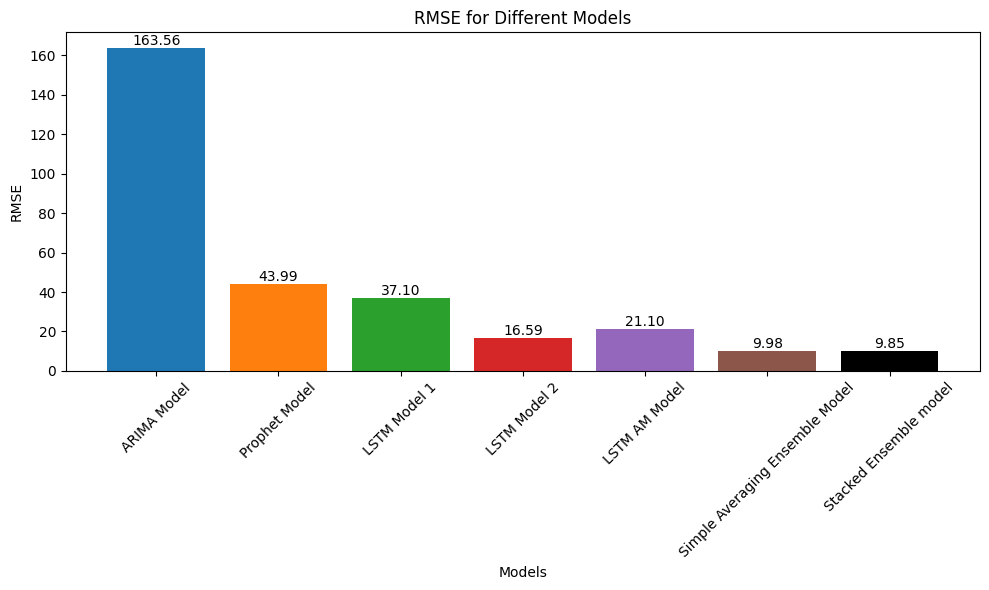

In [63]:
# Data for RMSE performance metrics
models = ['ARIMA Model','Prophet Model','LSTM Model 1', 'LSTM Model 2','LSTM AM Model','Simple Averaging Ensemble Model', 'Stacked Ensemble model']
rmse_values = [arima_rmse, prophet_rmse,lstm_model1_rmse, lstm_model2_rmse, lstm_am_model_rmse ,ensemble_rmse, updated_ensemble_rmse]

# Create the bar chart for RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 'black'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for Different Models')
plt.xticks(rotation=45)

# Displaying values on the bars
for i, val in enumerate(rmse_values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

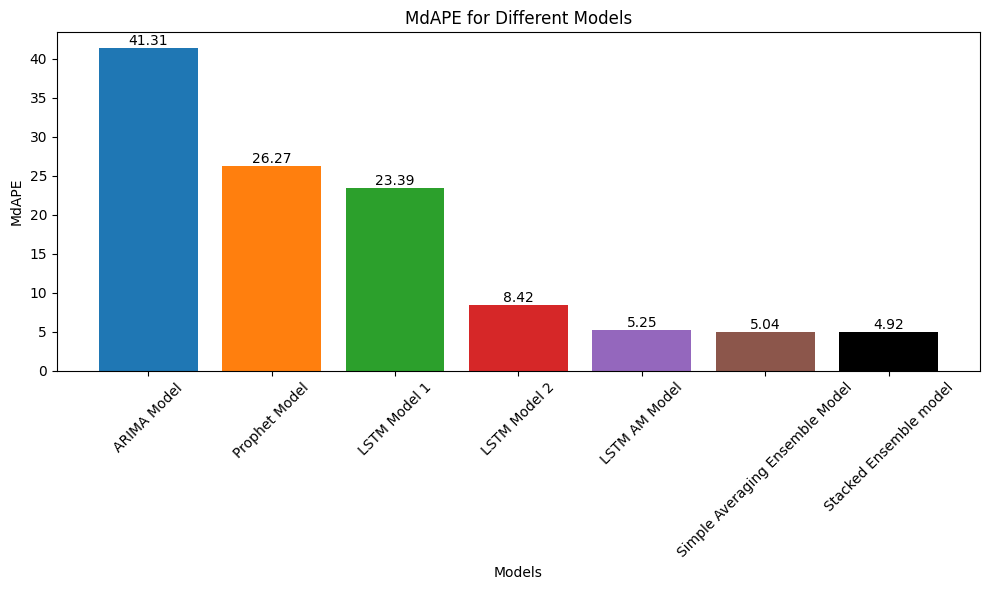

In [64]:
# Data for MdAPE performance metrics
mdape_values = [arima_mdape_value, prophet_mdape, lstm_model1_mdape, lstm_model2_mdape,
                lstm_am_model_mdape,ensemble_mdape, updated_ensemble_mdape]

# Create the bar chart for MdAPE
plt.figure(figsize=(10, 6))
plt.bar(models, mdape_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 'black'])
plt.xlabel('Models')
plt.ylabel('MdAPE')
plt.title('MdAPE for Different Models')
plt.xticks(rotation=45)

# Displaying values on the bars
for i, val in enumerate(mdape_values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

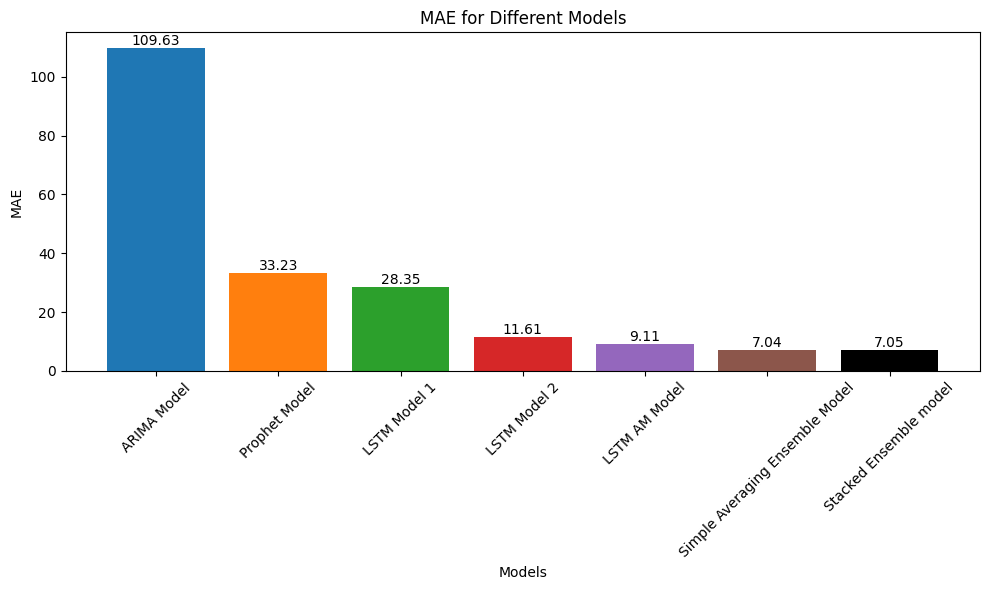

In [65]:
# Data for MAE performance metrics
mae_values = [arima_mae, prophet_mae, lstm_model1_mae, lstm_model2_mae,
              lstm_am_model_mae,ensemble_mae, updated_ensemble_mae]

# Create the bar chart for MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', 'black'])
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE for Different Models')
plt.xticks(rotation=45)

# Displaying values on the bars
for i, val in enumerate(mae_values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Conclusion: Ensemble Model perform better than the rest of the models

#Forecasting

In [55]:
# Forecasting dataframe
future_data = pd.DataFrame({
    'Date': pd.to_datetime([
        '2024-02-27', '2024-02-26', '2024-02-23', '2024-02-22',
        '2024-02-21', '2024-02-20', '2024-02-19', '2024-02-16',
        '2024-02-15', '2024-02-14'
    ]),
    'Close': [962.70, 936.95, 937.40, 932.30, 921.05, 926.35, 932.60, 938.60, 920.55, 918.30]
})

future_data

,Date,Close
0,2024-02-27,962.70
1,2024-02-26,936.95
2,2024-02-23,937.40
3,2024-02-22,932.30
4,2024-02-21,921.05
5,2024-02-20,926.35
6,2024-02-19,932.60
7,2024-02-16,938.60
8,2024-02-15,920.55
9,2024-02-14,918.30


In [56]:
# Calculating moving averages for the future dates
future_data['SMA'] = future_data['Close'].rolling(window=20, min_periods=1).mean()
future_data['EMA'] = future_data['Close'].ewm(span=20, adjust=False).mean()
smma_values = [future_data['Close'].iloc[0]] # Start with the first value
for price in future_data['Close'].iloc[1:]:
    smma_values.append((price * alpha) + smma_values[-1] * (1 - alpha))
future_data['SMMA'] = smma_values
weights = np.arange(1, 21)
weights = weights / weights.sum()
future_data['LWMA'] = future_data['Close'].rolling(window=20, min_periods=1).apply(lambda prices: np.dot(prices[-len(weights):], weights[-len(prices):]), raw=True)
future_data

,Date,Close,SMA,EMA,SMMA,LWMA
0,2024-02-27,962.70,962.700000,962.700000,962.700000,91.685714
1,2024-02-26,936.95,949.825000,960.247619,961.412500,176.334762
2,2024-02-23,937.40,945.683333,958.071655,960.211875,256.565000
3,2024-02-22,932.30,942.337500,955.617212,958.816281,331.845714
4,2024-02-21,921.05,938.080000,952.325097,956.927967,401.615476
5,2024-02-20,926.35,936.125000,949.851278,955.399069,467.504048
6,2024-02-19,932.60,935.621429,948.208299,954.259115,529.576667
7,2024-02-16,938.60,935.993750,947.293223,953.476160,587.779762
8,2024-02-15,920.55,934.277778,944.746249,951.829852,639.794286
9,2024-02-14,918.30,932.680000,942.227559,950.153359,687.210952


In [57]:
# Make the predictions for the next 10 days
ensemble_forecasting = (rf.predict(future_data[features[1:]]) + lr.predict(future_data[features[1:]])) / 2
ensemble_forecasting

array([887.77335584, 895.33765507, 894.06562522, 891.4871689 ,
       888.67773963, 885.15960691, 881.07915247, 899.08114815,
       895.69775449, 912.5416385 ])

In [58]:
# Make predictions for future dates
future_rf_predictions = rf.predict(future_data[features[1:]])
future_lr_predictions = lr.predict(future_data[features[1:]])
future_stacked_X = np.column_stack((future_rf_predictions, future_lr_predictions))
future_predictions = meta_lr.predict(future_stacked_X)

# Display the predictions
future_predictions

array([920.3132639 , 930.22084675, 928.64788101, 925.40521617,
       921.73296844, 917.05587104, 912.0419335 , 922.6080451 ,
       917.97640848, 927.35919111])

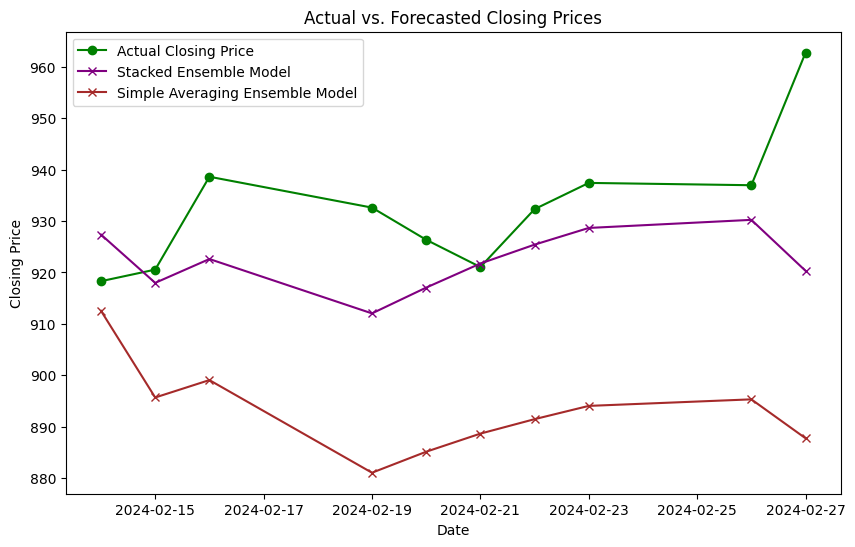

In [59]:
# Plotting the actual closing prices
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Close'], marker='o', label='Actual Closing Price', color='green')

# Plotting the predicted closing prices
plt.plot(future_data['Date'], future_predictions, marker='x', label='Stacked Ensemble Model', color='purple')
plt.plot(future_data['Date'], ensemble_forecasting, marker='x', label='Simple Averaging Ensemble Model', color='brown')


# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs. Forecasted Closing Prices')
plt.legend()

# Show the plot
plt.show()

In [60]:
# Define the forecasting function
def forecast_stock_prices(num_days):
    if num_days < 1 or num_days > 10:
        return "Please choose a number of days between 1 and 10."

    forecast_dates = future_data['Date'][:num_days]
    forecast_values = future_predictions[:num_days]
    forecast_df = pd.DataFrame({"Forecasted Close Price": forecast_values})
    return forecast_df.to_string(index=False)

In [61]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [62]:
import gradio as gr
# Create the Gradio interface
app = gr.Interface(
    fn=forecast_stock_prices,
    inputs="number",
    outputs="text",
    title="Tata Motors Stock Price Forecasting App",
    description="Enter the number of days for forecasting (1 to 10):"
)

# Launch the app
app.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://725c2b5ba088cb36e8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
